## Логистическая регрессия и случайный лес

In [20]:
%pylab inline
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Данные - https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [21]:
train = pd.read_csv('train.csv')

Задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.

In [22]:
train["price_range"].replace(to_replace=1, value=0, inplace=True)
train["price_range"].replace(to_replace=2, value=1, inplace=True)
train["price_range"].replace(to_replace=3, value=1, inplace=True)
data = train["price_range"]
train = train.iloc[:,0:20]
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, data, test_size=0.3, random_state=18)

## Часть 1. Логистическая регрессия

Нормирование данных

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

Обучение логистической регрессии

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:,1]

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba)

0.9995888477736663

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.98999999999999999

Предсказания показывают высокое качество по обеим метрикам.

In [28]:
w = lr.coef_
print(w)

[[  2.20453189e+00   7.02039070e-02  -5.65798295e-03  -8.53892982e-02
    6.32353202e-02  -8.22125385e-02   8.03594577e-02  -2.08572937e-01
   -2.74918660e-01   1.60179160e-01   5.16067552e-02   1.16896820e+00
    1.34546466e+00   8.52764820e+00  -1.61415005e-01   1.14125024e-01
    3.18832654e-02   1.52384329e-01  -7.96688841e-02  -1.50412156e-01]]


In [29]:
w_0 = lr.intercept_
print(w_0)

[ 0.08061748]


In [30]:
b = w_0 + np.sum(w * X_test, axis = 1)

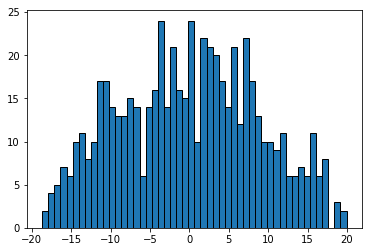

In [37]:
plt.hist(b, bins=50, edgecolor ='black')
plt.show()

In [39]:
pd.DataFrame(b).min()

0   -18.678439
dtype: float64

In [40]:
pd.DataFrame(b).max()

0    19.926851
dtype: float64

предсказания принимают значения примерно от -19 до 20. С одной стороны, эти значения не похожи на вероятности классов, так как они не принадлежат отрезку [0,1], однако они, как и вероятности классов, они показывают степень отношения к тому или иному классу.

In [34]:
def sigmoida(x):
    return 1 / (1 + np.exp(-x))

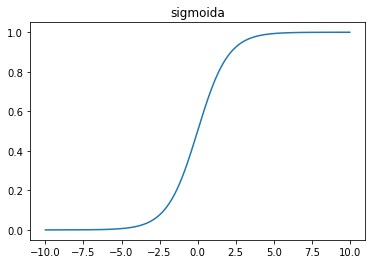

In [35]:
plt.title('sigmoida')
x = np.linspace(-10, 10, 1000)
plt.plot(x, sigmoida(x))
plt.show()

Функция принимает значения от 0 до 1, поэтому можно рассматривать как вероятность, функция гладкая.

In [274]:
sigmoida(b)
print(sigmoida(b))

[  9.99999908e-01   2.02923018e-07   1.37254069e-01   2.17041909e-01
   9.67990920e-01   1.60190749e-02   9.99940744e-01   2.95412034e-05
   6.68273533e-07   9.99420800e-01   9.99965667e-01   1.38430615e-01
   5.72330861e-01   9.22089361e-01   9.99999974e-01   5.48082773e-01
   9.98324364e-01   1.25921464e-06   4.18547754e-08   2.95526925e-03
   9.99998982e-01   2.76487684e-02   1.00502607e-07   6.46605140e-04
   9.72803241e-01   1.99926275e-08   7.21725787e-01   4.51854239e-04
   3.44630559e-04   8.65201175e-04   9.99999975e-01   3.87435640e-05
   5.67883523e-02   9.99999884e-01   1.09820814e-03   5.18549452e-03
   9.99914929e-01   1.72426206e-02   9.81440238e-01   3.34397379e-03
   9.99268646e-01   9.99999936e-01   9.99995663e-01   9.99115852e-01
   9.99730002e-01   9.43430905e-01   8.48061669e-07   9.97672522e-01
   9.99647173e-01   5.96577254e-02   9.99999860e-01   9.47110410e-01
   3.85957000e-06   9.63386342e-01   3.21573415e-02   1.08836502e-02
   1.25406654e-05   9.99675200e-01

In [275]:
y_proba

array([  9.99999908e-01,   2.02923018e-07,   1.37254069e-01,
         2.17041909e-01,   9.67990920e-01,   1.60190749e-02,
         9.99940744e-01,   2.95412034e-05,   6.68273533e-07,
         9.99420800e-01,   9.99965667e-01,   1.38430615e-01,
         5.72330861e-01,   9.22089361e-01,   9.99999974e-01,
         5.48082773e-01,   9.98324364e-01,   1.25921464e-06,
         4.18547754e-08,   2.95526925e-03,   9.99998982e-01,
         2.76487684e-02,   1.00502607e-07,   6.46605140e-04,
         9.72803241e-01,   1.99926275e-08,   7.21725787e-01,
         4.51854239e-04,   3.44630559e-04,   8.65201175e-04,
         9.99999975e-01,   3.87435640e-05,   5.67883523e-02,
         9.99999884e-01,   1.09820814e-03,   5.18549452e-03,
         9.99914929e-01,   1.72426206e-02,   9.81440238e-01,
         3.34397379e-03,   9.99268646e-01,   9.99999936e-01,
         9.99995663e-01,   9.99115852e-01,   9.99730002e-01,
         9.43430905e-01,   8.48061669e-07,   9.97672522e-01,
         9.99647173e-01,

In [42]:
sigmoida(b) == y_proba

array([ True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True, False,

False - из-за погрешности

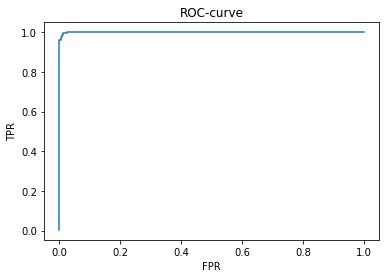

In [44]:
from sklearn.metrics import roc_curve
FPR, TPR, thresholds = roc_curve(y_test, y_proba)
plt.title('ROC-curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(FPR,TPR)
plt.show()

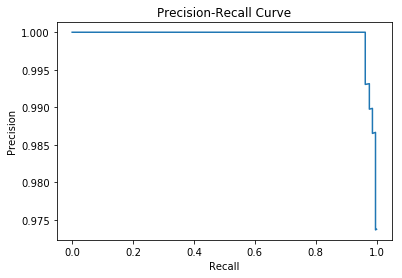

In [46]:
from sklearn.metrics import precision_recall_curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
precision, recall, tresholds = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.show()

## Часть 2. Случайные леса

In [62]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(123)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:,1]
y_pred = y_proba>0.5
print(y_proba)

[ 1.  0.  0.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.
  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.
  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.
  1.  0.  1.  0.  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.
  0.  0.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.
  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  1.  1.
  0.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.  0.
  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.
  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.
  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  1.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  1.
  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.
  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba)

0.93342667600093354

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.93333333333333335

### 2.1 Бэггинг классификаторов

In [65]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:,1]
for i in range(99):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_proba += clf.predict_proba(X_test)[:,1]
y_proba = y_proba/100
y_pred = y_proba>0.5

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba)

0.95442877621095445

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.93999999999999995

Качество улучшилось как и по roc-auc, так и по accuracy. Это связано с тем, что среднее значение предсказанных вероятностей (большее качество алгоритмов) улучшает качество

### 2.2 Сэмплирование обучающей выборки

In [85]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(123)  # для одинакового бутстрапа в каждом запуске
sample = np.random.randint(0, 1399, 1400)
clf = DecisionTreeClassifier()
clf.fit(np.array(X_train)[sample], np.array(y_train)[sample])
y_proba = clf.predict_proba(X_test)[:,1]
for i in range(99):
    sample = np.random.randint(0, 1399, 1400)
    clf = DecisionTreeClassifier()
    clf.fit(np.array(X_train)[sample], np.array(y_train)[sample])
    y_proba += clf.predict_proba(X_test)[:,1]
y_proba = y_proba/100
y_pred = y_proba>0.5

In [86]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba)

0.99431054216532777

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.96166666666666667

Качество значительно улучшилось по обеим метрикам, так как используя бэггинг, мы получаем меньшую коррелированность деревьев

### 2.3 Выбор случайного подмножества признаков

In [71]:

from sklearn.tree import DecisionTreeClassifier
max_features = int(np.round(np.sqrt(X_train.shape[1])))
clf = DecisionTreeClassifier(max_features=max_features)
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:,1]
for i in range(99):
    clf = DecisionTreeClassifier(max_features=max_features)
    clf.fit(X_train, y_train)
    y_proba += clf.predict_proba(X_test)[:,1]
y_proba = y_proba/100
y_pred = y_proba>0.5

In [72]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba)

0.99403273660699398

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.94999999999999996

Качество сравнимо со сэмплированием, то есть так же лучше по обеим метрикам по сравнению с бэггингом.

### 2.4 = 2.2 + 2.3

In [74]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(123)
max_features = int(np.round(np.sqrt(X_train.shape[1])))
sample = np.random.randint(0, 1399, 1400)
clf = DecisionTreeClassifier(max_features=max_features)
clf.fit(np.array(X_train)[sample], np.array(y_train)[sample])
y_proba = clf.predict_proba(X_test)[:,1]
for i in range(99):
    sample = np.random.randint(0, 1399, 1400)
    clf = DecisionTreeClassifier(max_features=max_features)
    clf.fit(np.array(X_train)[sample], np.array(y_train)[sample])
    y_proba += clf.predict_proba(X_test)[:,1]
y_proba = y_proba/100
y_pred = y_proba>0.5

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba)

0.99401051216232739

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.94666666666666666

Качество не улучшилось по сравнению с сэмплированием и выбором случайного множества признаков.

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba)

0.99401051216232739

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.94666666666666666

Значение метрик в точности равно с объединением бутстрапа и случайного выбора множества признаков, так как тот же самый алгоритм

### 2.5 Влияние количества используемых деревьев в случайном лесе

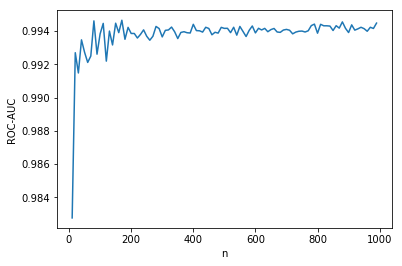

In [89]:
from sklearn.ensemble import RandomForestClassifier
roc = []
n_est = []
for n in range(10,1000,10):
    clf = RandomForestClassifier(n_estimators = n)
    clf.fit(X_train, y_train)
    y_proba = clf.predict_proba(X_test)[:,1]
    roc.append(roc_auc_score(y_test, y_proba))
    n_est.append(n)
plt.xlabel('n')
plt.ylabel('ROC-AUC')
plt.plot(list(range(10, 1000, 10)), roc)
plt.show()

Начиная примерно с 200 дереьвев, качество алгоритма почти не улучшается

### 2.6 Важность признаков

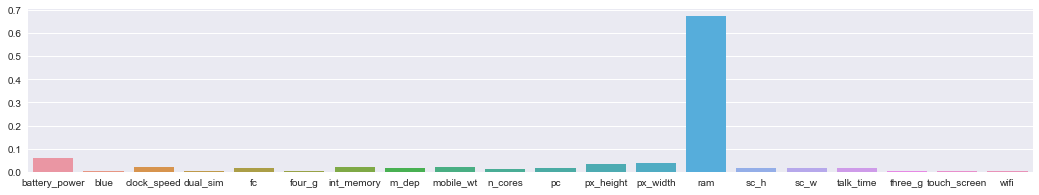

In [307]:
import seaborn
plt.figure(figsize=(18,3))
seaborn.barplot( train.columns,clf.feature_importances_)